## Day 28 Lecture 1 Assignment

In this assignment, we will learn about making predictions with linear models. We will use the king county housing dataset loaded below and analyze the regression from this dataset.

In [29]:
%matplotlib inline

import math
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [30]:
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/kc_house_data.csv')

In [31]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


We'll start by filtering out columns and keeping only: price, bedrooms, bathrooms, sqft_living, floors, and waterfront.

In [32]:
# answer below:
df = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront']]

Next create a pair plot in Seaborn to see the relationships between your features.

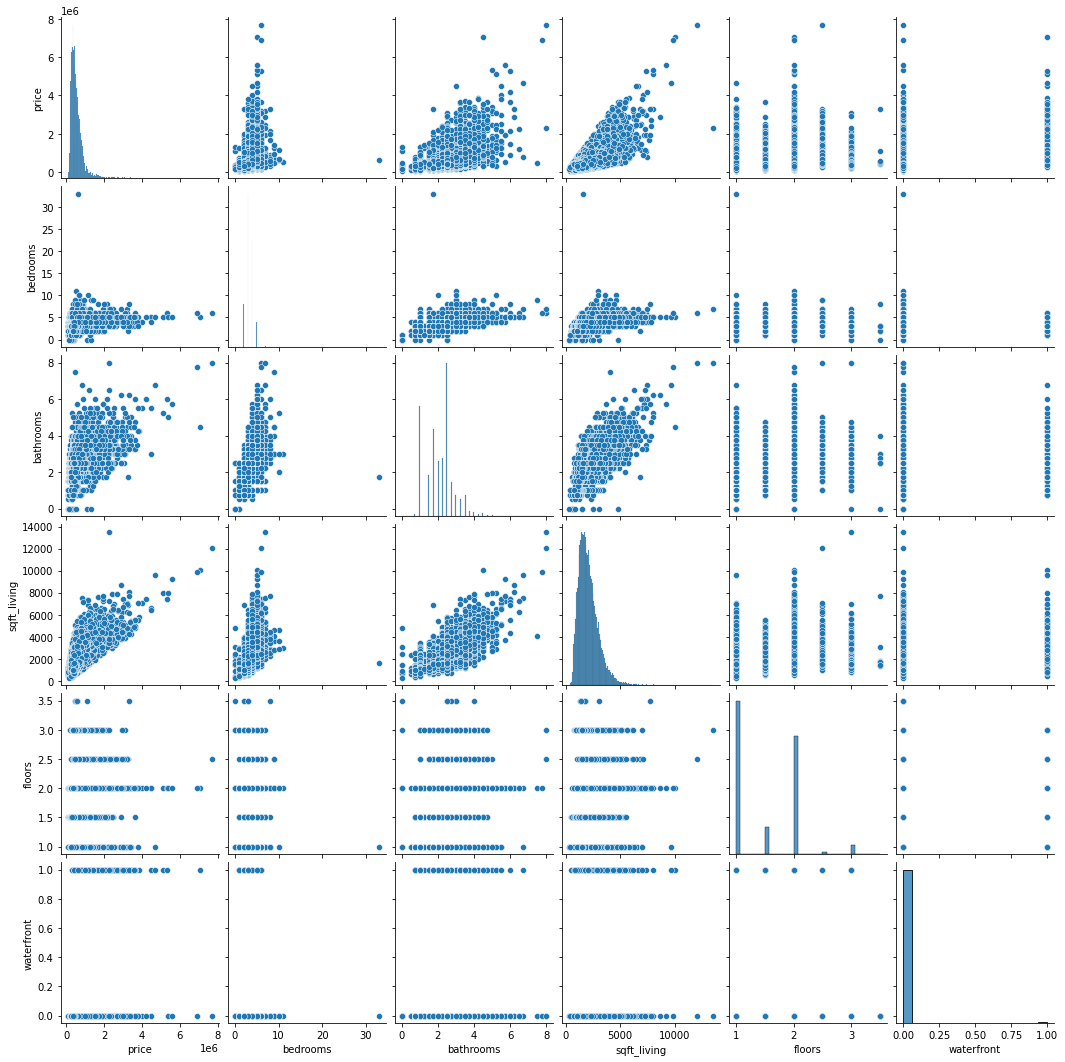

In [33]:
# answer below:
sn.pairplot(df)
plt.show()

In [34]:
from scipy.stats.mstats import winsorize

df['price'] = winsorize(df['price'], (0, 0.1))

{'boxes': [<matplotlib.lines.Line2D at 0x7f50b71aff60>],
 'caps': [<matplotlib.lines.Line2D at 0x7f50b72819b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f50b7101470>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f50b71010f0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f50b72812b0>,
  <matplotlib.lines.Line2D at 0x7f50b7281630>]}

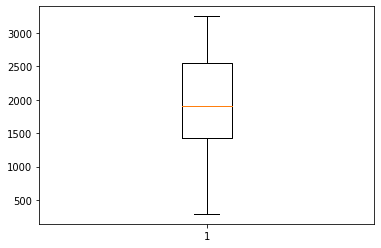

In [35]:
df['sqft_living'] = winsorize(df['sqft_living'], (0, 0.1))
plt.boxplot(df['sqft_living'])

There are two noticeable outliers here that will cause problems. Remove them.

In [36]:
# answer below:
#We had outliers for price and for sqft living. We winsorized the top 10%.

Next, we'll check for missing values and remove rows containing missing values. We will also make sure that all our data is numeric and convert the columns that are of object type to numeric. Make sure to remove any rows with missing data resulting from the conversion to numeric.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  float64
 1   bedrooms     21613 non-null  int64  
 2   bathrooms    21613 non-null  float64
 3   sqft_living  21613 non-null  int64  
 4   floors       21613 non-null  float64
 5   waterfront   21613 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1013.2 KB


In [38]:
# answer below:
#There are no missing values in the data set. 
#Ther are no objects in the data set.


Split the data into test and train subsets. Use 20% of the data for the test subset. Use price as the dependent variable.

In [39]:
# answer below:
from sklearn.model_selection import train_test_split
X= df.drop(columns='price')
Y = df['price']

X_train, x_test, Y_train, y_test= train_test_split(X, Y, test_size=.20)

Check the model assumptions: homoscedacity, normal errors, and multicollinearity

In [40]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()

model = lin.fit(X_train, Y_train)

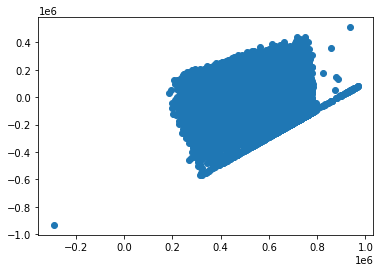

In [41]:
y_pred = lin.predict(X_train)

error = y_pred - Y_train

plt.scatter(y_pred, error)
plt.show()

In [42]:
from scipy.stats import bartlett 
from scipy.stats import levene

bart_stats = bartlett(y_pred, error) 
lev_stats = levene(y_pred, error)

print(bart_stats)
print(lev_stats)

BartlettResult(statistic=71.53862704254361, pvalue=2.7188317172245648e-17)
LeveneResult(statistic=56.160976647063194, pvalue=6.836730405022793e-14)


In [54]:
df['bedrooms'].nunique()

13

In [44]:
#answer below:
#We have heterodescasity. No mulitlinear colinearity amongs the variables.

Create your final linear model and produce a model summary. Look at the coefficients and interpret their meaning. How do each of them influence the final prediction?

In [47]:
# answer below
import statsmodels.api as sm

X = sm.add_constant(X_train)
#we apply ordinary least square to our variables
results = sm.OLS(Y_train, X).fit()
#print results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     3039.
Date:                Wed, 21 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:10:01   Log-Likelihood:            -2.3124e+05
No. Observations:               17290   AIC:                         4.625e+05
Df Residuals:                   17284   BIC:                         4.625e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.194e+05   5115.203     23.335      

Predict the y values for the test sample using our model above.

In [56]:
X = sm.add_constant(x_test)
#we apply ordinary least square to our variables
results = sm.OLS(y_test, X).fit()
#print results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     739.3
Date:                Wed, 21 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:18:32   Log-Likelihood:                -57853.
No. Observations:                4323   AIC:                         1.157e+05
Df Residuals:                    4317   BIC:                         1.158e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.188e+05   1.05e+04     11.262      

Plot the true vs. predicted values and compute the MAE, MSE, RMSE and MAPE. How accurate is our model?

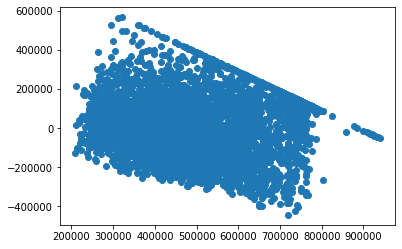

In [59]:
pred_value = lin.predict(x_test)
residual = y_test - pred_value

plt.scatter(pred_value, residual)
plt.show()

In [61]:
# answer below:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('MSE: {}\nMAE: {}\nR2 {}:'.format(mean_squared_error(y_test, pred_value), 
                                        mean_absolute_error(y_test, pred_value),
                                        r2_score(y_test, pred_value)))

MSE: 24640958752.64046
MAE: 128782.75185812953
R2 0.46105939449880806:


In [ ]:
#There is a 128000 dollars of error on average. I think the model is inaccurate. 